In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [17]:
X, y = load_iris(return_X_y = True)

train score :  0.9642857142857143
test score :  0.9473684210526315


[Text(0.375, 0.875, 'x[2] <= 2.5\nentropy = 1.585\nsamples = 112\nvalue = [37, 38, 37]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 75\nvalue = [0, 38, 37]'),
 Text(0.25, 0.375, 'x[1] <= 2.65\nentropy = 0.384\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(0.125, 0.125, 'entropy = 0.75\nsamples = 14\nvalue = [0, 11, 3]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.75, 0.375, 'x[2] <= 4.95\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

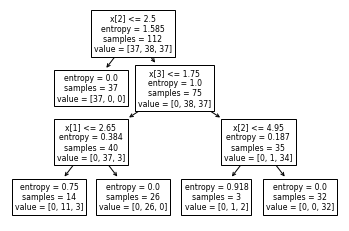

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 120)

# decision tree는 보통 train score가 높게 나온다. ==> random forest를 사용하는 이유
# 과적중을 막기위해 depth를 제한한다. == max_depth

# 수치는 entropy와 gini를 사용할 수 있다.

# min_samples_split == The minimum number of samples required to split an internal node:

# min_sample_leaf == leaf의 최소 nodes개수를 제한한다.
# he minimum number of samples required to be at a leaf node. A split point at any depth will only be considered
# if it leaves at least min_samples_leaf training samples in each of the left and right branches. 
# This may have the effect of smoothing the model, especially in regression.

m = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 3)
m.fit(X_train, y_train)

print('train score : ', m.score(X_train, y_train))
print('test score : ', m.score(X_test, y_test))



plot_tree(m)

In [31]:
from sklearn.model_selection import KFold

m = KFold(n_splits = 3)
for train, test in m.split(X):
    print('')
    #print('train : ', train)
    #print(X[train], y[train])
    #print('test : ', test)
    #print(X[test], y[test])
    d = DecisionTreeClassifier()
    d.fit(X[train], y[train])
    
    print('Train score : ', d.score(X[train], y[train]))
    print('Test score : ', d.score(X[test], y[test]))


Train score :  1.0
Test score :  0.0

Train score :  1.0
Test score :  0.0

Train score :  1.0
Test score :  0.0


In [28]:
a = np.array([10, 20, 30, 40, 50])
a[[2,4,1]]

array([30, 50, 20])

In [ ]:
#model_selecion.LeaveOneOut == Test용 하나의 세트만 때두고 나머지는 다 Train 시키는 것
#model_selection.POut도 있다.